In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\eyobh\\Downloads\\medical-charges.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
(df.duplicated()).sum()

np.int64(1)

In [9]:
df = df.drop_duplicates()


In [10]:
df.duplicated().any()

np.False_

In [11]:
#Create a new column bmi_group
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

df['bmi_group'] = pd.qcut(df['bmi'], q = 4, labels = labels)

In [12]:
df[['bmi', 'bmi_group']].head()

,bmi,bmi_group
0,27.900,Normal
1,33.770,Overweight
2,33.000,Overweight
3,22.705,Underweight
4,28.880,Normal


In [13]:
#create a new column age_group
labels = ["Young Adult", "Adult", "Middle-aged", "Senior"]
df["age_group"] = pd.qcut(df['age'], q = 4, labels = labels)

In [14]:
df[['age', 'age_group']].head()

,age,age_group
0,19,Young Adult
1,18,Young Adult
2,28,Adult
3,33,Adult
4,32,Adult


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_group,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Normal,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Overweight,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Overweight,Adult
3,33,male,22.705,0,no,northwest,21984.47061,Underweight,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Normal,Adult


**Exploratory Data Analysis**

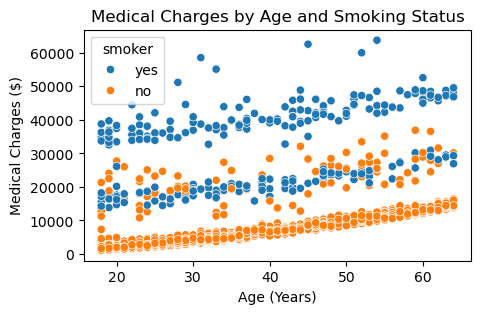

In [16]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'smoker')
plt.title('Medical Charges by Age and Smoking Status')
plt.xlabel('Age (Years)')
plt.ylabel('Medical Charges ($)')
plt.show()

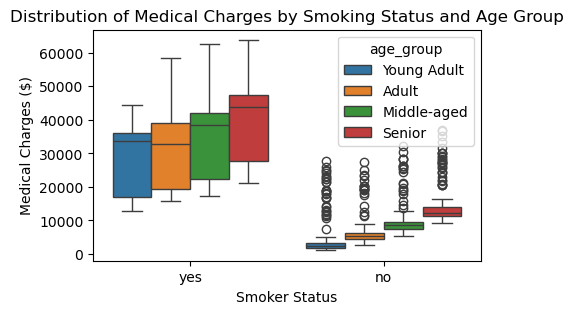

In [17]:
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x = 'smoker', y = 'charges', hue = 'age_group')
plt.title('Distribution of Medical Charges by Smoking Status and Age Group')
plt.xlabel('Smoker Status')
plt.ylabel('Medical Charges ($)')
plt.show()

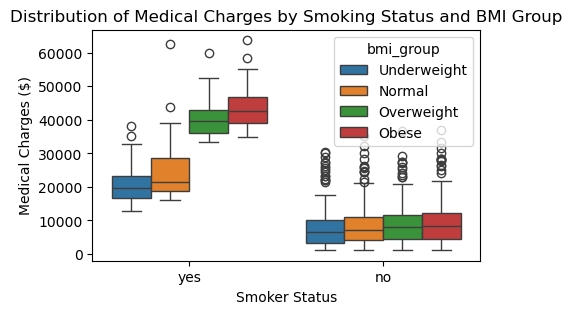

In [18]:
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x = 'smoker', y = 'charges', hue = 'bmi_group')
plt.title('Distribution of Medical Charges by Smoking Status and BMI Group')
plt.xlabel('Smoker Status')
plt.ylabel('Medical Charges ($)')
plt.show()

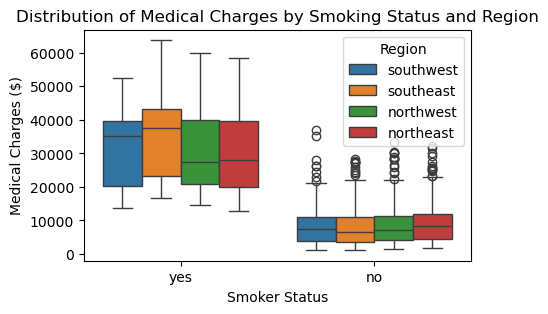

In [19]:
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x = 'smoker', y = 'charges', hue = 'region')
plt.title('Distribution of Medical Charges by Smoking Status and Region')
plt.xlabel('Smoker Status')
plt.ylabel('Medical Charges ($)')
plt.legend(title='Region')
plt.show()

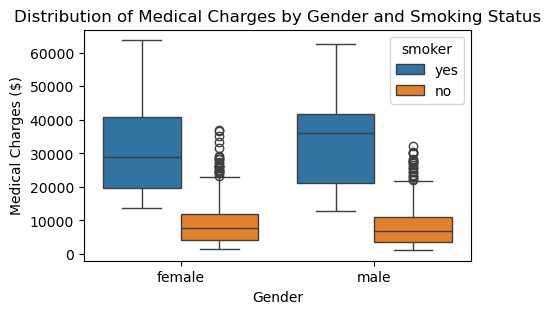

In [20]:
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x = 'sex', y = 'charges', hue = 'smoker')
plt.title('Distribution of Medical Charges by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Medical Charges ($)')
plt.show()

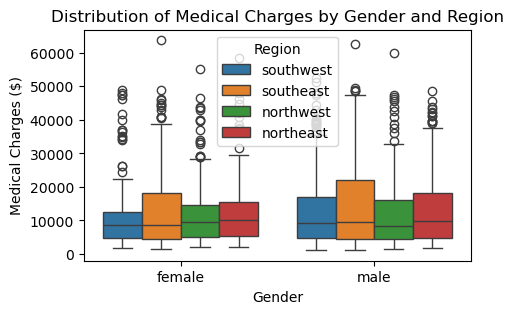

In [21]:
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x = 'sex', y = 'charges', hue = 'region')
plt.title('Distribution of Medical Charges by Gender and Region')
plt.xlabel('Gender')
plt.ylabel('Medical Charges ($)')
plt.legend(title='Region')
plt.show()

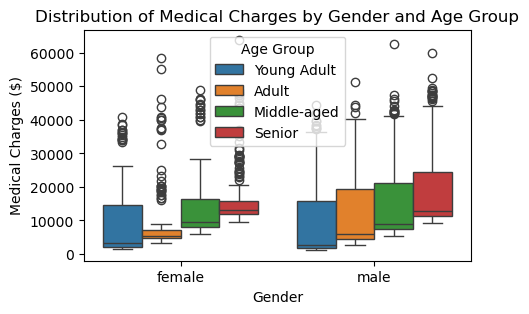

In [22]:
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x = 'sex', y = 'charges', hue = 'age_group')
plt.title('Distribution of Medical Charges by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Medical Charges ($)')
plt.legend(title='Age Group')
plt.show()

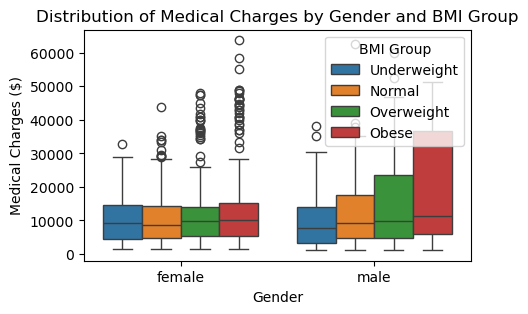

In [23]:
plt.figure(figsize=(5, 3))
sns.boxplot(data = df, x = 'sex', y = 'charges', hue = 'bmi_group')
plt.title('Distribution of Medical Charges by Gender and BMI Group')
plt.xlabel('Gender')
plt.ylabel('Medical Charges ($)')
plt.legend(title='BMI Group')
plt.show()

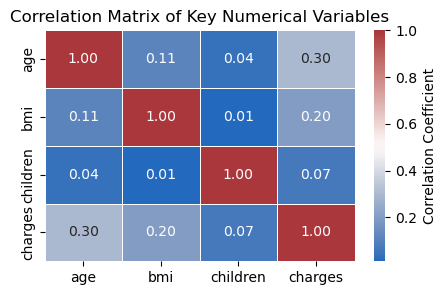

In [24]:
# 1. Define the numerical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']

# 2. Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# 3. Set the size of the canvas
plt.figure(figsize=(5, 3))

# 4. Create the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='vlag',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

# 5. Set the title and display
plt.title('Correlation Matrix of Key Numerical Variables')
plt.show()

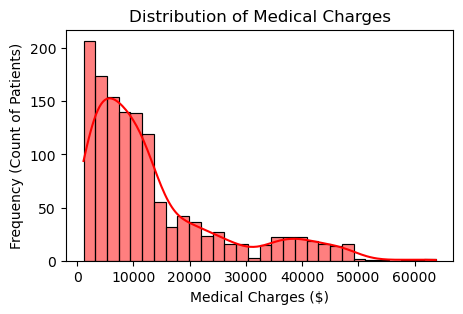

In [25]:


# 1. Set the size of the canvas
plt.figure(figsize=(5, 3))

# 2. Create the Histogram with a Kernel Density Estimate (KDE) line
# The KDE line smooths the distribution curve.
sns.histplot(
    df['charges'], 
    kde=True, 
    bins=30, 
    color='red'
)

# 3. Set the title and labels
plt.title('Distribution of Medical Charges')
plt.xlabel('Medical Charges ($)')
plt.ylabel('Frequency (Count of Patients)')

# 4. Display the plot
plt.show()

**Connecting the data to MySQL Server**

In [26]:
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

# Replace these with your MySQL username/password
user = 'root'           # change if needed
password = 'Miki@!23456'
host = "localhost"
port = "3306"

password = quote_plus(password)

# Connect without specifying a database
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}?charset=utf8mb4", pool_pre_ping=True)

# Create the database
with engine.connect() as conn:
    conn.execute(text("CREATE DATABASE IF NOT EXISTS insurance CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci;"))
    print("✅ Database 'insurance' created (or already exists).")


✅ Database 'insurance' created (or already exists).


In [27]:
# Now connect to the 'insurance' database
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/insurance?charset=utf8mb4", pool_pre_ping=True)

# Test
with engine.connect() as conn:
    result = conn.execute(text("SELECT NOW()")).fetchone()
    print("✅ Connected to 'insurance' database! Server time:", result[0])


✅ Connected to 'insurance' database! Server time: 2025-10-23 09:49:45


In [28]:
df.to_sql('insurance_data', con=engine, if_exists='replace', index=False)


1337

In [29]:
from sqlalchemy import text

# Quick test query
try:
    with engine.connect() as conn:
        result = conn.execute(text("SELECT NOW() AS server_time;")).fetchone()
        print("✅ Query successful! MySQL server time:", result[0])

except Exception as e:
    print("❌ Query failed:", e)


✅ Query successful! MySQL server time: 2025-10-23 09:49:45
